In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Loading the six data files from the HELA database:
https://github.com/exoclime/HELA/tree/master/example_dataset

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
train_data = np.load('training.npy')
test_data  = np.load('testing.npy')
wavelength_data = np.load('wavelength.npy')
error_bars_data = np.load('error_bars.npy')
# The WASP12b spectrum is not needed
# WASP12b_data = np.load('WASP12b.npy')

Split the training and testing data into 13 features (wavelength bins) and 5 labels: $T$, $H_2O$, $HCN$, $NH_3$ and clouds:

In [4]:
x_train = train_data[:,:13]
y_train = train_data[:,13:]
x_test  = test_data[:,:13]
y_test  = test_data[:,13:]

There are 79,999 training samples and 20,001 testing samples:

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(79999, 13) (79999, 5)
(20001, 13) (20001, 5)


Distributions of the 5 input model parameters (the target variables).

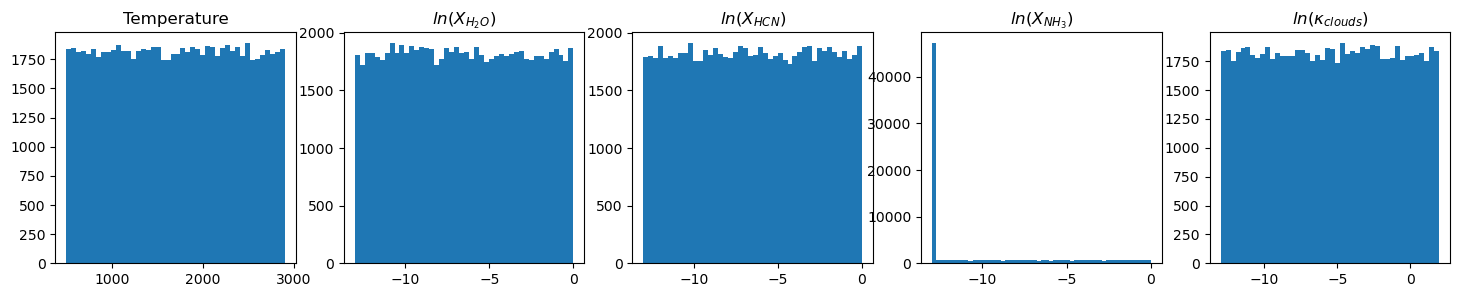

In [5]:
plt.rcParams['figure.figsize'] = [18,3]

titles_par = ['Temperature', '$ln(X_{H_2O})$', '$ln(X_{HCN}$)', '$ln(X_{NH_3})$', '$ln(\kappa_{clouds})$']
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.hist(y_train[:,i], 'auto')
    plt.title(titles_par[i])

Distributions of the 13 features (bin values).

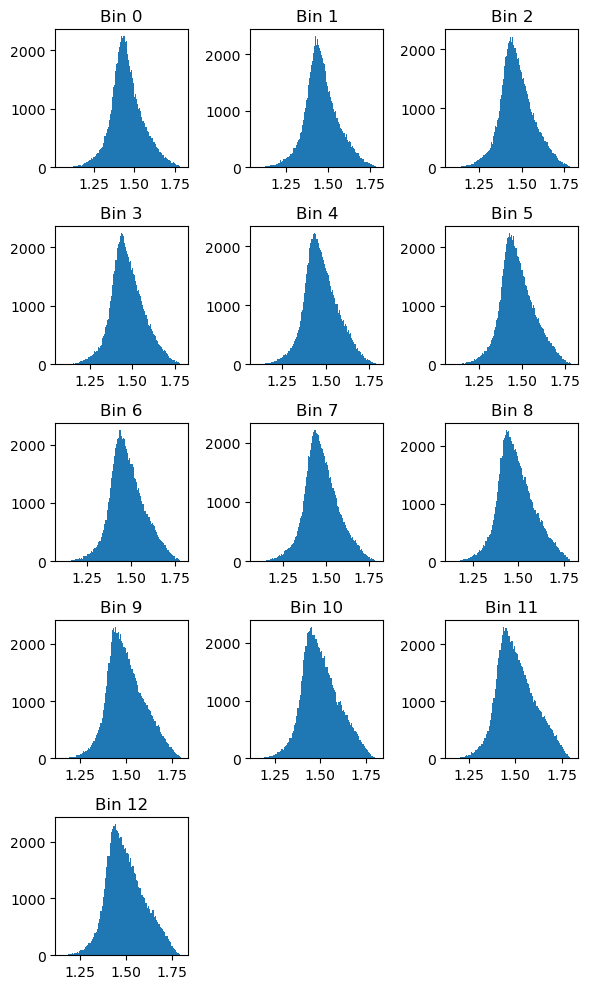

In [6]:
plt.rcParams['figure.figsize'] = [6,10]

titles_bins = ['Bin 0','Bin 1','Bin 2','Bin 3','Bin 4','Bin 5','Bin 6',
                 'Bin 7','Bin 8','Bin 9','Bin 10','Bin 11','Bin 12']
for i in range(13):
    plt.subplot(5,3,i+1)
    plt.hist(x_train[:,i], 'auto')
    plt.title(titles_bins[i])
plt.tight_layout()

Plot a sample spectrum, e.g., the first planet in the training data:

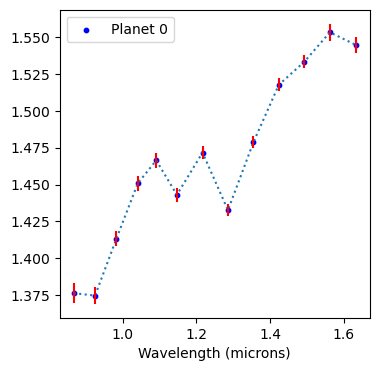

In [7]:
plt.rcParams['figure.figsize'] = [4,4]

plt.plot(wavelength_data,x_train[0,:], linestyle='dotted')
plt.errorbar(wavelength_data,x_train[0,:], yerr=error_bars_data,
             fmt='none', marker='o', ecolor='red')
plt.scatter(wavelength_data,x_train[0,:], c='blue', marker='o', s=10, label='Planet 0')
plt.xlabel('Wavelength (microns)')
plt.legend()

plt.show()

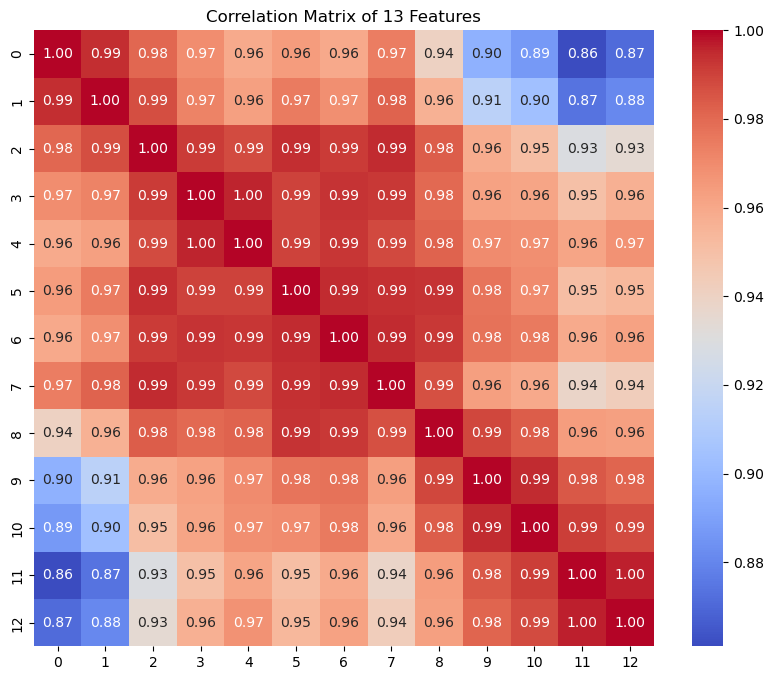

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(x_train):
    """
    Plots the correlation matrix for the 13 features using Pearson correlation method.

    Parameters:
    x_train (np.ndarray or pd.DataFrame): The training data with 13 features.
    """
    if isinstance(x_train, np.ndarray):
        x_train = pd.DataFrame(x_train)

    corr_matrix = x_train.corr(method='pearson')

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix of 13 Features')
    plt.show()

# Example usage
plot_correlation_matrix(x_train)


In [10]:
#figure 4
mu = np.mean(x_train, axis=1)
sigma = np.std(x_train, axis=1)

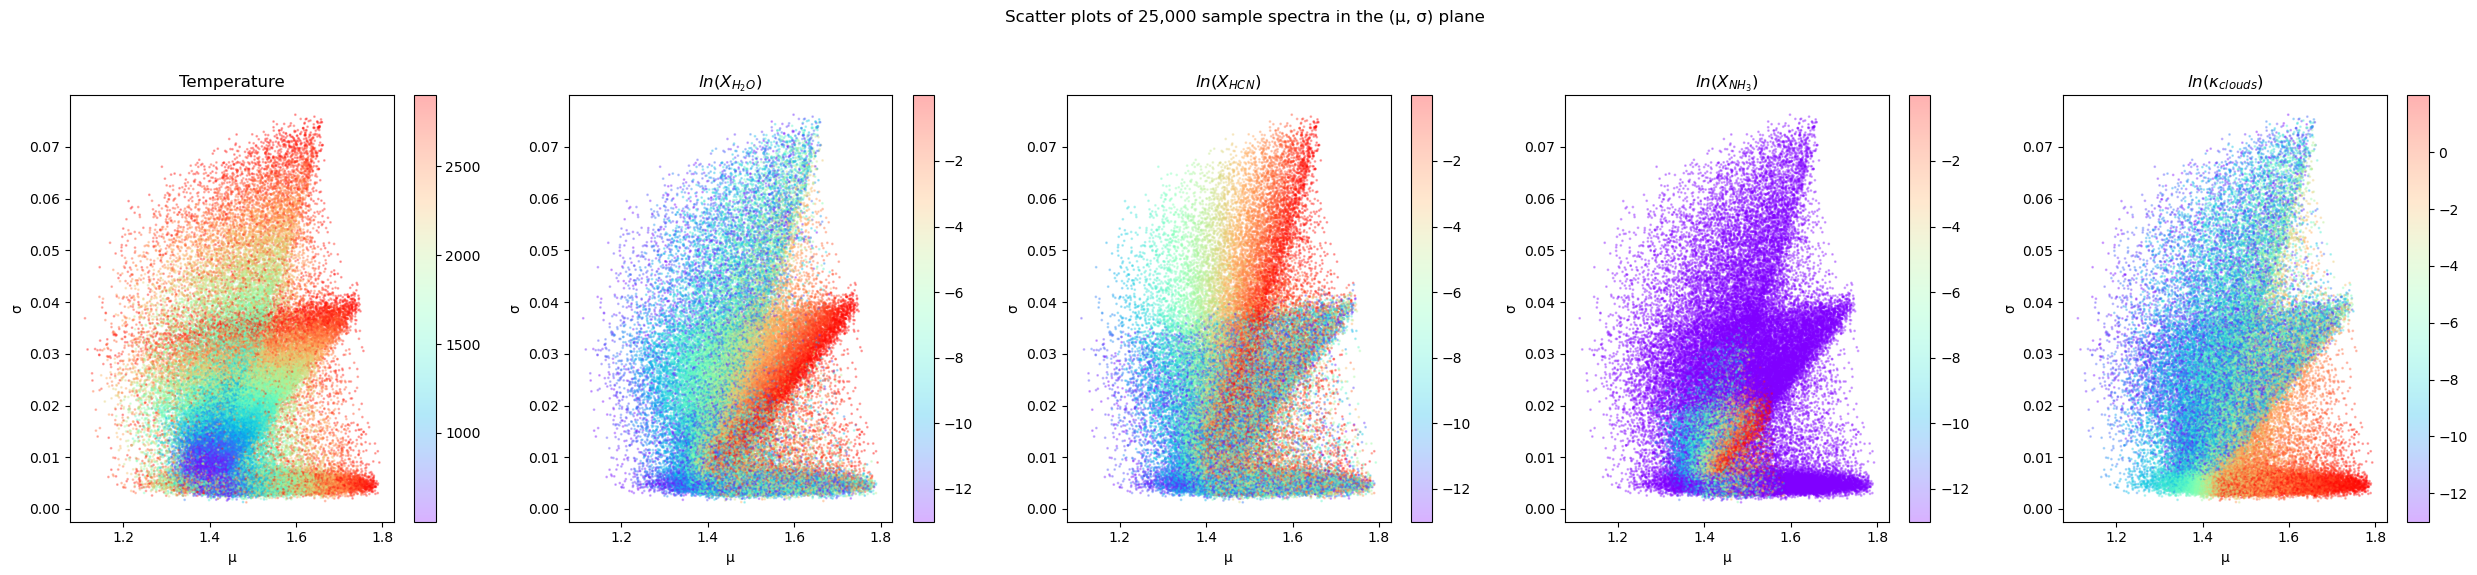

In [19]:
fig, axs = plt.subplots(1, 5, figsize=(25, 6))
fig.suptitle('Scatter plots of 25,000 sample spectra in the (μ, σ) plane')

for i in range(5):
    scatter = axs[i].scatter(mu, sigma, c=y_train[:, i], cmap='rainbow', alpha=0.3, s=1)
    axs[i].set_xlabel('μ')
    axs[i].set_ylabel('σ')
    axs[i].set_title(titles_par[i])
    fig.colorbar(scatter, ax=axs[i], orientation='vertical')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

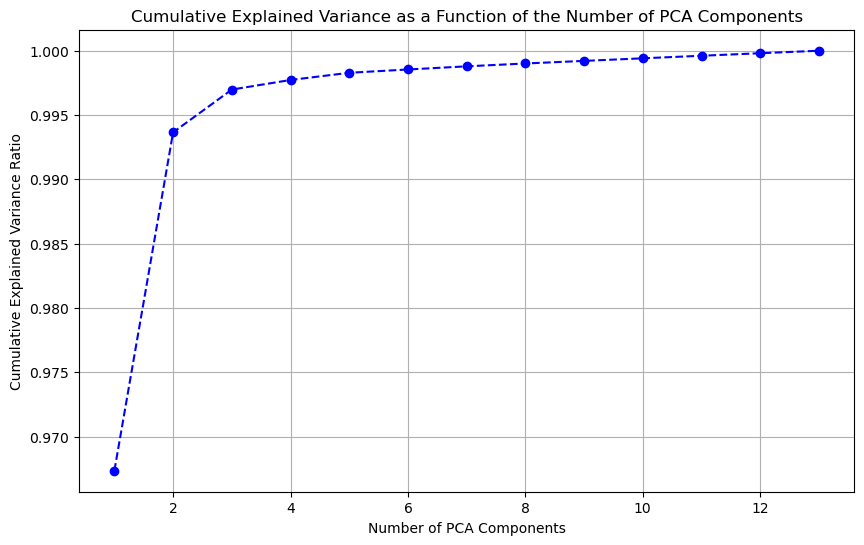

In [21]:
#figure 5
pca = PCA(n_components=13)
pca.fit(x_train)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 14), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance as a Function of the Number of PCA Components')
plt.grid(True)
plt.show()

In [22]:
#figure 7

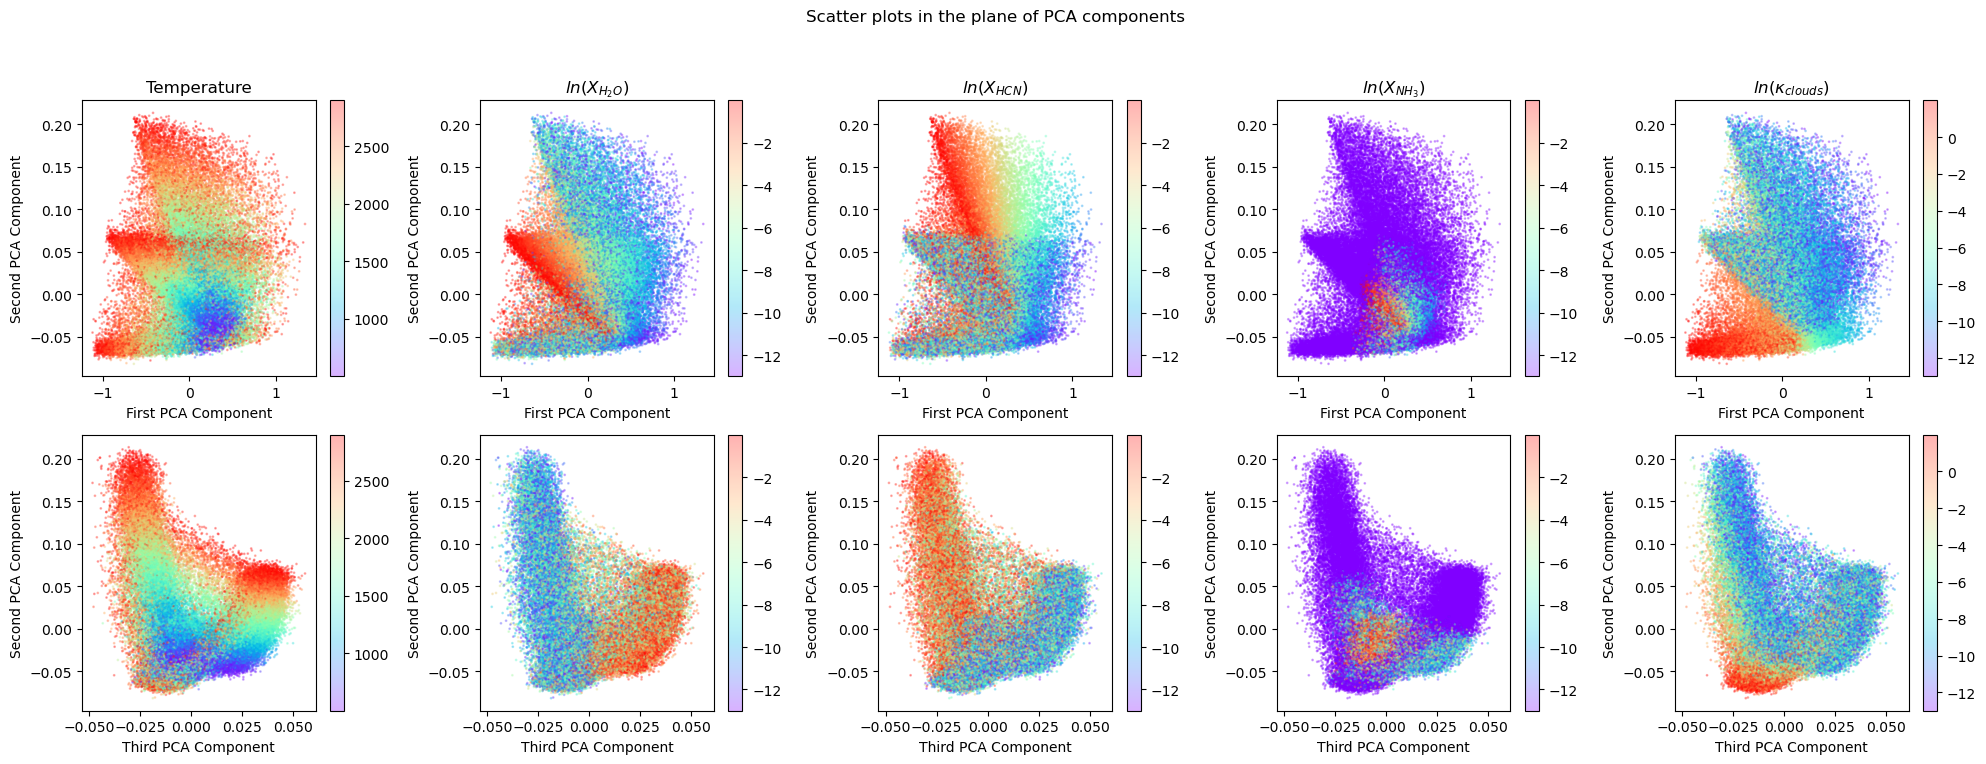

In [27]:
pca = PCA(n_components=13)
pca_components = pca.fit_transform(x_train)

titles_par = ['Temperature', '$ln(X_{H_2O})$', '$ln(X_{HCN}$)', '$ln(X_{NH_3})$', '$ln(\kappa_{clouds})$']

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Scatter plots in the plane of PCA components')

for i in range(5):
    scatter1 = axs[0, i].scatter(pca_components[:, 0], pca_components[:, 1], c=y_train[:, i], cmap='rainbow', alpha=0.3, s=1)
    axs[0, i].set_xlabel('First PCA Component')
    axs[0, i].set_ylabel('Second PCA Component')
    axs[0, i].set_title(titles_par[i])
    fig.colorbar(scatter1, ax=axs[0, i], orientation='vertical')

    scatter2 = axs[1, i].scatter(pca_components[:, 2], pca_components[:, 1], c=y_train[:, i], cmap='rainbow', alpha=0.3, s=1)
    axs[1, i].set_xlabel('Third PCA Component')
    axs[1, i].set_ylabel('Second PCA Component')
    fig.colorbar(scatter2, ax=axs[1, i], orientation='vertical')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
